## In this section we estimate the bias of private information about inflation

### Findings:

* Population in Russia is systematically tempted to raise it expectations about the inflation level.
* We estimate the bias to be 0.6

For more information see the code below.

In [50]:
using Statistics, StatsBase, Plots, StatsPlots, KernelDensity, Distributions, HypothesisTests, PyCall
ENV["GKS_ENCODING"]="utf-8"

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278


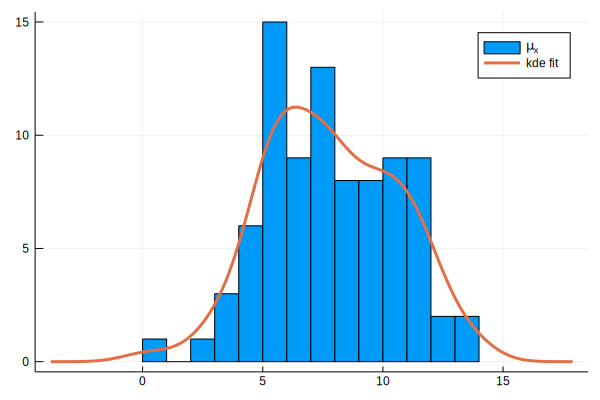

In [60]:
# Monthly data from cbr.ru on inflation expectations from 2014 to 2021. File is attached.

# Observed inflation (percepted by respondents):

i_obs = [12.0, 11.6, 13.3, 12.5, 11.9, 11.4, 12.5, 14.3, 13.6, 15.2, 19.8, 27.4, 27.1,
         27.6, 27.9, 26.8, 23.2, 26.5, 24.3, 22.2, 23.3, 20.5, 21.1, 18.9, 18.5, 18.5, 19.2, 18.6, 16.5, 17.4,
         15.1, 17.2, 14,8, 14.0, 13.8, 12.1, 12.4, 11.9, 11.3, 11.2, 11.2, 10.4, 10.0, 9.9, 9.4, 9.2,
         8.3, 9.2, 10.6, 10.3, 10.4, 10.2, 10.1, 10.1, 10.2, 10.1, 10.6, 10.0, 10.5, 10.4, 10.2, 9.9, 10.0,
         9.9, 9.4, 8.7, 9.4, 8.6, 8.7, 8.3, 9.2, 9.4, 9.6, 10.7, 12.0, 12.8, 12.3, 12.7, 14.5, 14.8, 14.9, 16.5, 16.5, 15.6, 16.3]

# Inflation calculated by the Bank of Russia

infl = [6.23, 7.35, 7.58, 7.8, 7.44, 8.04, 8.29, 9.06, 11.36,
         14.96, 16.68, 16.9, 16.39, 15.78, 15.28, 15.65, 15.67, 15.59, 14.96, 12.9,
         9.76, 8.07, 7.27, 7.26, 7.31, 7.48, 7.22, 6.85, 6.41, 6.09, 5.79, 5.39,
         5.05, 4.61, 4.26, 4.26, 4.13, 4.09, 4.36, 3.85, 3.3, 2.98, 2.72, 2.48, 2.51,
         2.2, 2.18, 2.34, 2.4, 2.41, 2.27, 2.51, 3.07, 3.37, 3.54, 3.83, 4.26,
         4.97, 5.23, 5.25, 5.16, 5.13, 4.67, 4.57, 4.31, 4.0, 3.76, 3.54, 3.04,
          2.43, 2.3, 2.55, 3.1, 3.02, 3.21, 3.37, 3.58, 3.67, 3.99, 4.42, 4.9,
          5.19, 5.67, 5.79, 5.53, 6.02]

# Consider, bias of private information is the deviation between percepted inflation from real one:

μ_x = i_obs - infl

# As we can observe from estimated kde, the distribution, in general, behaves nicely.

p = kde(μ_x)
histogram(μ_x,label="\\mu_x", nbins = 20)
plot!(p.x,p.density .* length(μ_x), linewidth=3,color=2,label="kde fit") # nb of elements*bin width

In [59]:
# Normalized measure, that we'll use in the model

normalized_μ_x = mean(μ_x) - mean(infl)

1.6079069767441885